<a href="https://colab.research.google.com/github/jaybabulkar/ML-Model/blob/master/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing the Required Libraries for Exploratory Data Analysis


In [ ]:
#import some necessary libraries
import numpy as np # LInear Algebra
import pandas as pd #Data Preprocessing CSV file I/O
import matplotlib.pyplot as plt #Matlab style plotting
% matplotlib inline

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import seaborn as sns
color= sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
      pass
warnings.warn=ignore_warn #ignore warnings (from sklearn and seaborn)

plt.rcParams["figure.figsize"] =(10,6)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


1.1 Loading the data into the DataFrame

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
#To dispay the top 5 rows
df.head (5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#To display the bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.info

<bound method DataFrame.info of           Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of           Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]>

2.Dropping irrelevant columns

In [ ]:
df=df.drop(['Engine Fuel Type','Market Category'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


3.Renaming the columns

In [ ]:
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


4.Dropping the Duplicate Rows

In [ ]:
df.shape

(11914, 14)

In [ ]:
duplicate_rows_df=df[df.duplicated()]
print ("number of duplicate rows:",duplicate_rows_df.shape)

number of duplicate rows: (791, 14)


In [ ]:
df=df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape

(11123, 14)

5.Detecting Outliers

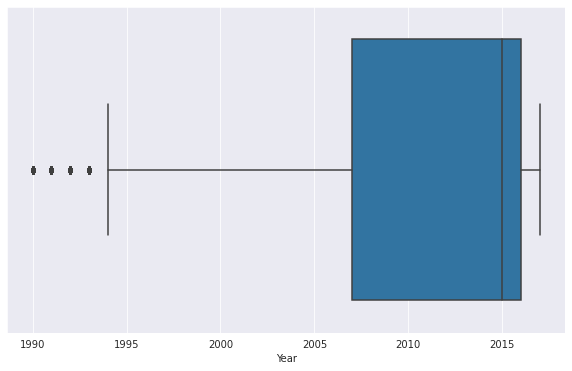

In [ ]:
sns.boxplot(x=df['Year'])


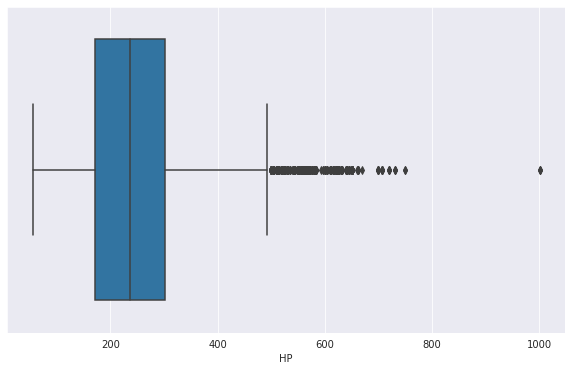

In [ ]:
sns.boxplot(x=df['HP'])

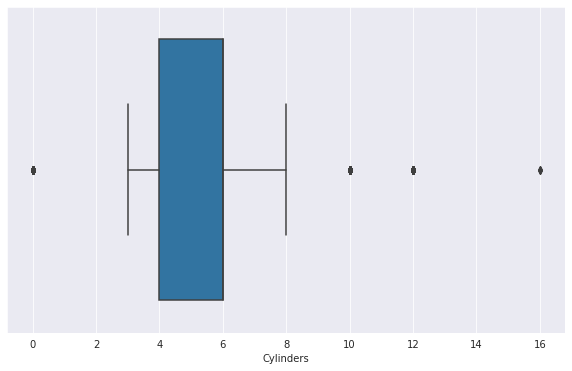

In [ ]:
sns.boxplot(x=df['Cylinders'])

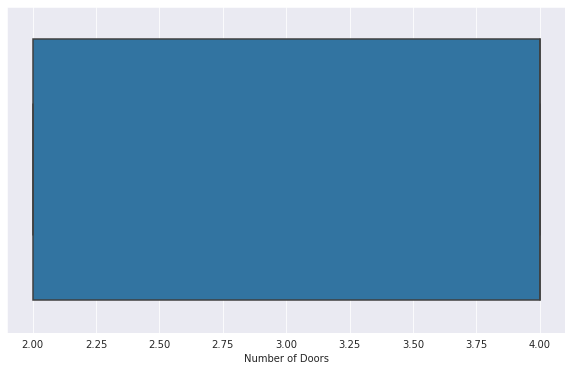

In [ ]:
sns.boxplot(x=df['Number of Doors'])

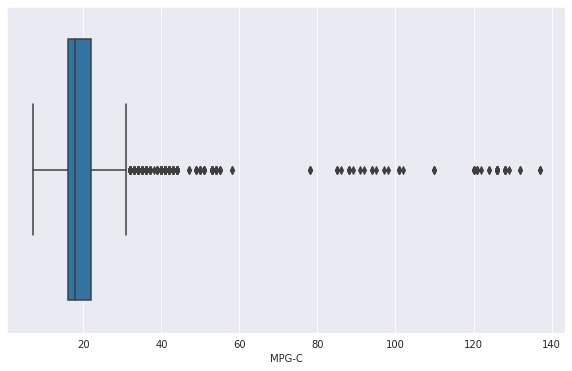

In [ ]:
sns.boxplot(x=df['MPG-C'])

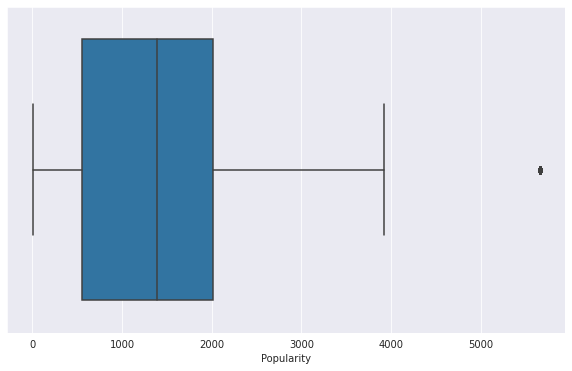

In [ ]:
sns.boxplot(x=df['Popularity'])

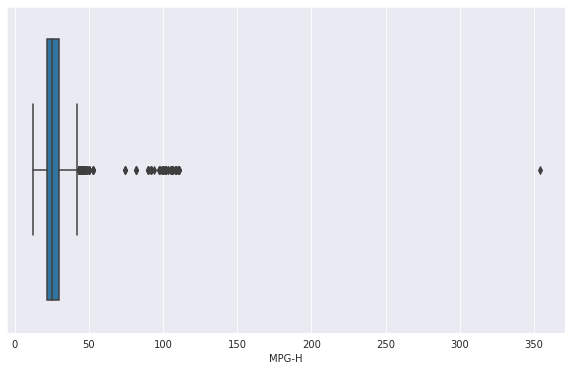

In [ ]:
sns.boxplot(x=df['MPG-H'])

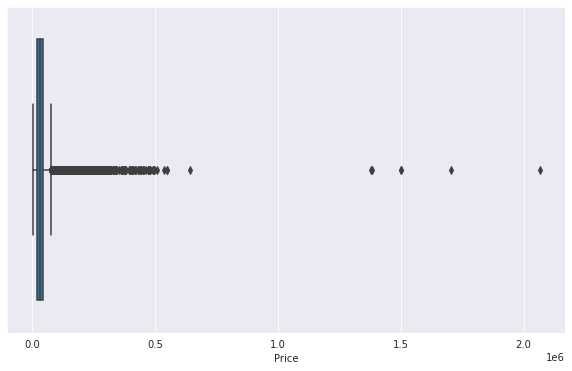

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21405.0
dtype: float64


In [ ]:
df= df[~((df < (Q1-1.5 * IQR))|(df> (Q3+1.5 * IQR))).any(axis=1)]

In [ ]:
df.shape

(8577, 14)

4.1 Dropping or Imputing the Missing or Null Values

In [ ]:
df.shape

(8577, 14)

In [ ]:
print(df.isnull().sum())

Make                0
Model               0
Year                0
HP                 11
Cylinders          19
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [ ]:
#Compute the Mean
mean_hp= df['HP'].mean()
mean_cy= df['Cylinders'].mean()


#Find the missing values with calculated mean
df['HP'].fillna(mean_hp, inplace=True)
df['Cylinders'].fillna(mean_cy, inplace=True)

In [ ]:
print (df.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Number of Doors    0
Vehicle Size       0
Vehicle Style      0
MPG-H              0
MPG-C              0
Popularity         0
Price              0
dtype: int64


In [ ]:
df.shape

(8577, 14)

What are the most represented car brands ?

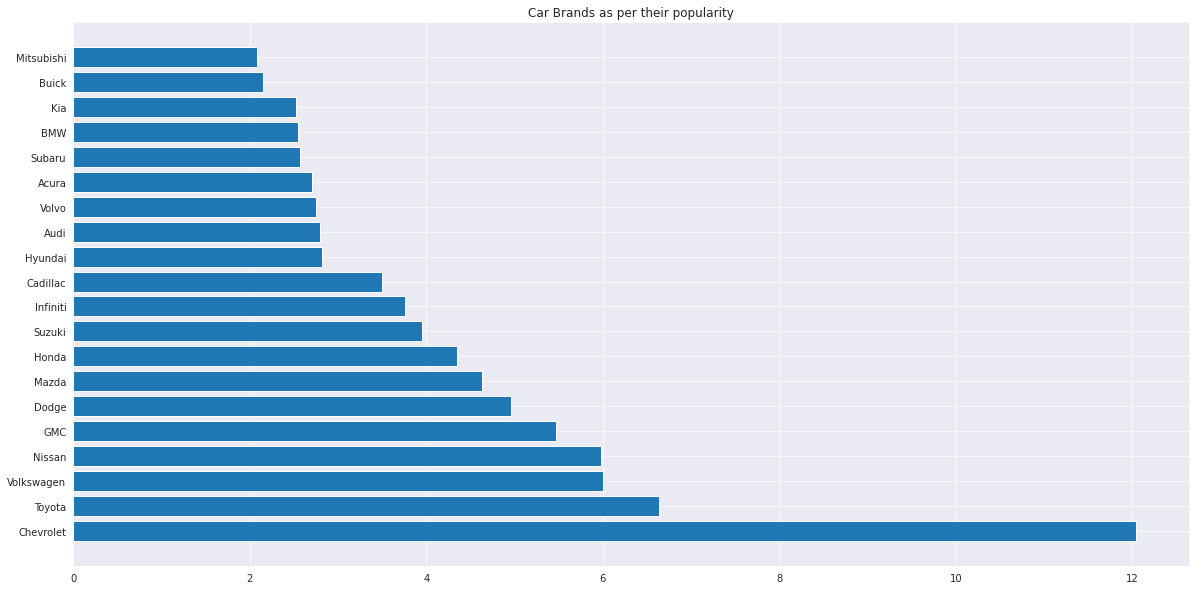

In [ ]:
#Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 20 Car Brands
popular_labels=counts.index[:20]

#Plots
plt.figure(figsize=(20,10))
plt.barh(popular_labels,width=counts[:20])
plt.title('Car Brands as per their popularity')
plt.show()

In [ ]:
prices = df[['Make','Price']].loc [ (df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()

In [ ]:
print(prices)

                   Price
Make                    
Chevrolet   28207.045499
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


7.Correlation Matrix

In [ ]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.324642,-0.106158,0.241442,0.373182,0.335114,0.200714,0.592198
HP,0.324642,1.000000,0.733862,0.040779,-0.452887,-0.553957,0.095299,0.744730
Cylinders,-0.106158,0.733862,1.000000,0.020606,-0.690973,-0.745874,0.013160,0.388698
Number of Doors,0.241442,0.040779,0.020606,1.000000,0.008198,0.024603,-0.076936,0.131498
MPG-H,0.373182,-0.452887,-0.690973,0.008198,1.000000,0.937008,0.094122,-0.120675
MPG-C,0.335114,-0.553957,-0.745874,0.024603,0.937008,1.000000,0.082506,-0.196708
Popularity,0.200714,0.095299,0.013160,-0.076936,0.094122,0.082506,1.000000,0.112736
Price,0.592198,0.744730,0.388698,0.131498,-0.120675,-0.196708,0.112736,1.000000


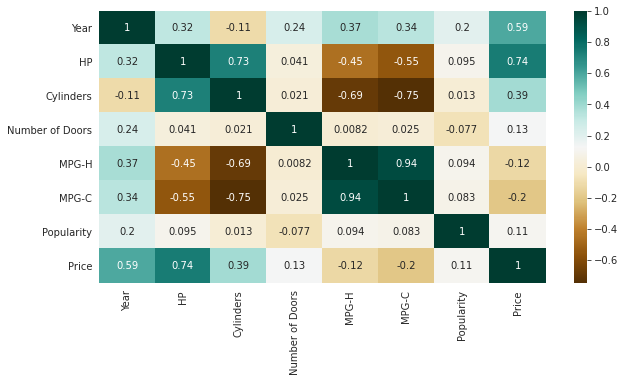

In [ ]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)

**High Correlation between**

1. Cylinders and HP
2. MPG-H and MPG-C

The more cylinders the car has, the more powerful it is.

**High Anticorrelation**

1. Cylinders and MPG-H

Highway MPG/ Engine Cylinders have a strong negative correlation with Highway MPG and City MPG because lower MPG figures mean highetr fuel consumption.


8. Exploratory Data Analysis

ScatterPlot

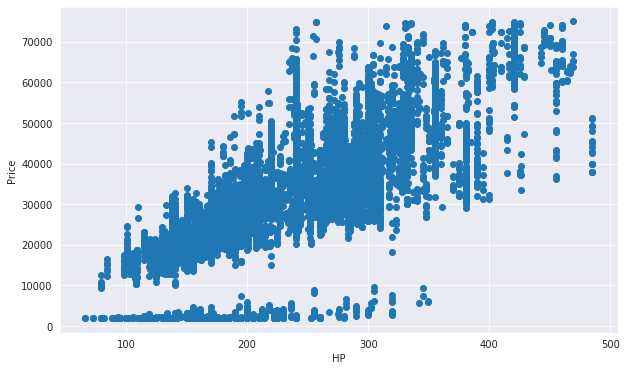

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Which Vehicle Style Segment of Car Segment sold the most?

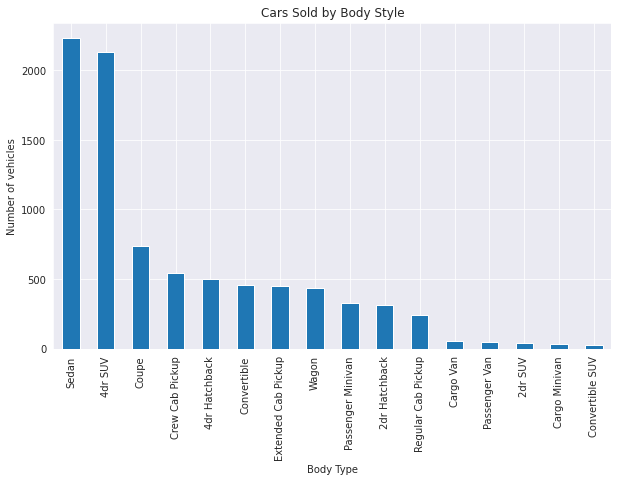

In [ ]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars Sold by Body Style")
plt.ylabel('Number of vehicles')
plt.xlabel('Body Type');

Vehicle Style Type and Drive Type Analysis

Text(0.5, 0, 'Count of Vehicles')

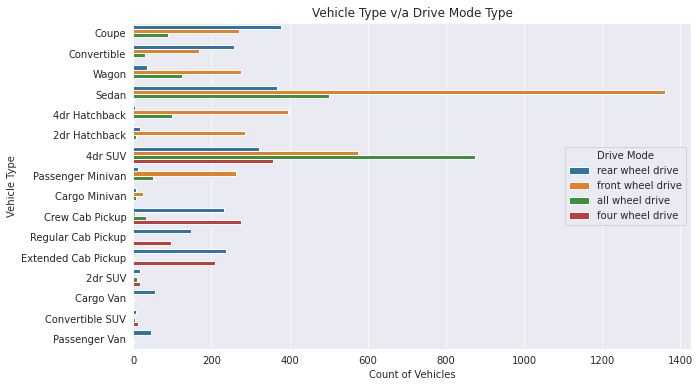

In [ ]:
sns.countplot(y='Vehicle Style', data=df, hue='Drive Mode')
plt.title("Vehicle Type v/a Drive Mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of Vehicles')

In [ ]:
#Create a new column PriceGroup and assign the value based on car pricr
df['price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'],include_lowest=True)
df['price_group']=df['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

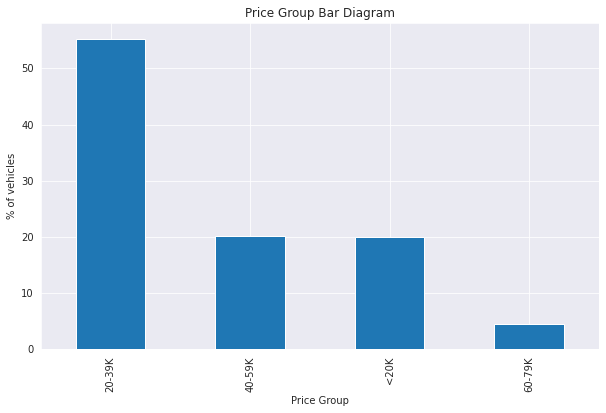

In [ ]:
(df['price_group'].value_counts()/len(df)*100).plot.bar(figsize=(10,6))
plt.title("Price Group Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group')